# Lab 1

# Data "munging"
Los conjuntos de datos del mundo real son desordenados. No hay forma de evitarlo: los conjuntos de datos tienen "agujeros" (datos faltantes), la cantidad de formatos en los que se pueden almacenar datos es infinita, y la mejor estructura para compartir datos no siempre es la óptima para analizarlos, de ahí la necesidad de [munge](http://dictionary.reference.com/browse/munge) ellos. Como se ha señalado correctamente en muchos puntos de venta ([eg](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor- work.html? _r = 0)), la mayor parte del tiempo [gastado](https://twitter.com/BigDataBorat/status/306596352991830016) en lo que se llama (Geo-) Data Science está relacionado no solo con el modelado sofisticado y perspicacia, pero tiene que ver con tareas mucho más básicas y menos exóticas, como obtener datos, procesarlos, convertirlos en una forma que haga posible el análisis y explorarlos para conocer sus propiedades básicas.

Por lo intensivo y relevante que es este aspecto, sorprendentemente se ha publicado muy poco sobre patrones, técnicas y mejores prácticas para una limpieza, manipulación y transformación de datos rápida y eficiente. En esta sesión, usará algunos conjuntos de datos del mundo real y aprenderá cómo procesarlos en Python para que puedan ser transformados y manipulados, si es necesario, y analizados. Para esto, presentaremos parte de lo fundamental del análisis de datos y la computación científica en Python. Estas son herramientas fundamentales que se utilizan constantemente en casi cualquier tarea relacionada con el análisis de datos.

Este cuaderno cubre lo básico y el contenido que se espera que sea aprendido por cada estudiante. Usamos un conjunto de datos preparado que nos ahorra gran parte del procesamiento más complejo que va más allá del nivel introductorio al que se dirige la sesión. 

En este cuaderno, discutimos varios patrones para limpiar y estructurar los datos de manera adecuada, que incluyen ordenar, subconjuntos y agregar; y terminamos con una visualización básica. Una extensión adicional presenta trucos más avanzados para manipular datos tabulares.

Antes de tener nuestras manos sucias de datos, permítanos importar todas las bibliotecas adicionales que necesitaremos, para poder sacar eso del camino y enfocarnos en la tarea en cuestión:

In [2]:

import os              # utilidades del sistema
import pandas as pd    # Pandas es la libreria de manipulacion de datos tabulares por excelencia
import matplotlib.pyplot as plt # libreria de ploteo basica
import seaborn as sns  # Una herramienta de plots linda

# Nos asegura que los plots se vean en el notebooks
%matplotlib inline


## Dataset


Vamos a usar la data de molinetes del subte. Se puede descargar del [portal de datos abiertos del Gobierno de la Ciudad](https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes)


In [4]:
db = pd.read_csv('data/molinetes_historico_2018.csv',sep=';')
db.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_CBARROS_S_TURN01,CASTRO BARROS,1,0,0,1,40
1,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_LIMA_S_TURN03,LIMA,4,0,0,4,33
2,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PASCO_TURN01,PASCO,1,0,0,1,36
3,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PERU_S_TURN01,PERU,4,0,0,4,31
4,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PJUNTA_S_TURN02,PRIMERA JUNTA,2,0,0,2,43


Detengámonos un momento para saber cómo hemos leído el archivo. Estos son los aspectos principales a tener en cuenta:

* Estamos utilizando el método `read_csv` de la biblioteca` pandas`, que hemos importado con el alias `pd`.
* En esta forma simple, todo lo que se requiere es pasar la ruta al archivo que queremos leer, y en nuestro caso el separador que no es la coma tradicional, si no el punto y coma

## Datos, en rodajas y en cubitos

¡Ahora estamos listos para comenzar a jugar e interrogar al conjunto de datos! Lo que tenemos a nuestro alcance es una tabla que  muestra la cantidad de transacciones por molinete de las lineas de subte de Buenos Aires cada 15 minutos.

* Inspeccionando cómo se ve. Podemos verificar las líneas X (superiores) de la tabla pasando X al método `head` (` tail`). Por ejemplo, para las cinco líneas superiores e inferiores:

In [6]:
db.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_CBARROS_S_TURN01,CASTRO BARROS,1,0,0,1,40
1,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_LIMA_S_TURN03,LIMA,4,0,0,4,33
2,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PASCO_TURN01,PASCO,1,0,0,1,36
3,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PERU_S_TURN01,PERU,4,0,0,4,31
4,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PJUNTA_S_TURN02,PRIMERA JUNTA,2,0,0,2,43


In [7]:
db.tail()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1947636,201802,28/02/2018,23:30:00,23:45:00,LINEA_H,LINEAH_SANTAFE_SUR_TURN01,SANTA FE,1,0,0,1,86
1947637,201802,28/02/2018,23:30:00,23:45:00,LINEA_A,LINEA_A_CONGRESO_S_TURN03,CONGRESO,1,0,0,1,35
1947638,201802,28/02/2018,23:30:00,23:45:00,LINEA_B,LINEA_B_GALLARDO_S_TURN01,ANGEL GALLARDO,1,0,0,1,28
1947639,201802,28/02/2018,23:30:00,23:45:00,LINEA_E,LINEA_E_EMITRE_TURN02,EMILIO MITRE,0,0,0,0,53
1947640,201802,28/02/2018,23:30:00,23:45:00,LINEA_H,LINEA_H_VENEZUELA_NORTE_TURN01,VENEZUELA,1,0,0,1,4


* Un informe resumen de la tabla

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947641 entries, 0 to 1947640
Data columns (total 12 columns):
PERIODO            int64
FECHA              object
DESDE              object
HASTA              object
LINEA              object
MOLINETE           object
ESTACION           object
PAX_PAGOS          int64
PAX_PASES_PAGOS    int64
PAX_FRANQ          int64
TOTAL              int64
ID                 int64
dtypes: int64(6), object(6)
memory usage: 178.3+ MB


* Ver cuantos casos y columnas tenemos

In [12]:
db.shape

(1947641, 12)

¿Cuán confiados se sentirían de trabajar con casi 2 millones de filas en un excel?

* Resumen de los valores de la tabla

In [9]:
db.describe()

,PERIODO,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
count,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06
mean,2.018015e+05,2.284090e+01,1.503819e-02,6.732031e-01,2.352914e+01,4.439516e+01
std,4.992969e-01,2.559934e+01,1.253787e-01,1.201028e+00,2.596725e+01,2.546339e+01
min,2.018010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.018010e+05,5.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,2.100000e+01
50%,2.018010e+05,1.500000e+01,0.000000e+00,0.000000e+00,1.500000e+01,4.200000e+01
75%,2.018020e+05,3.100000e+01,0.000000e+00,1.000000e+00,3.200000e+01,6.900000e+01
max,2.018020e+05,3.700000e+02,3.000000e+00,3.600000e+01,3.700000e+02,8.600000e+01


Tenga en cuenta que el resultado también es un objeto `DataFrame`, por lo que puede hacer con él las mismas cosas que haría con la tabla original (por ejemplo, escribirla en un archivo).

En este caso, el resumen podría presentarse mejor si la tabla es "transpuesta":

In [10]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,1947641.0,201801.473491,0.499297,201801.0,201801.0,201801.0,201802.0,201802.0
PAX_PAGOS,1947641.0,22.840898,25.599343,0.0,5.0,15.0,31.0,370.0
PAX_PASES_PAGOS,1947641.0,0.015038,0.125379,0.0,0.0,0.0,0.0,3.0
PAX_FRANQ,1947641.0,0.673203,1.201028,0.0,0.0,0.0,1.0,36.0
TOTAL,1947641.0,23.529140,25.967254,0.0,6.0,15.0,32.0,370.0
ID,1947641.0,44.395155,25.463393,1.0,21.0,42.0,69.0,86.0


In [15]:
# que periodos tenemos?
db.PERIODO.unique()

array([201801, 201802], dtype=int64)

In [16]:
#cuantos casos en cada uno?
db.PERIODO.value_counts()

201801    1025451
201802     922190
Name: PERIODO, dtype: int64

In [18]:
#nos quedamos con la data mas reciente

db = db.loc[db.PERIODO == 201802,:] 
db.PERIODO.value_counts()

201802    922190
Name: PERIODO, dtype: int64

In [ ]:
#nos quedamos con las columnas que nos interesan

In [20]:
db.columns

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [22]:
#elimino periodo porque ya se que es todo febrero

In [23]:
db = db.loc[:,['FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID']]

In [24]:
#tamiben puedo eliminar la variable molinete porque a lo sumo vamos a trabajar con datos por estacion, no quiero tanta desagregacion

In [25]:
db = db.drop(['MOLINETE'],axis=1)

In [26]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82


### Crear columnas

Quiero saber el dia de la semana de cada fecha, pero es un texto simple

In [39]:
db.FECHA.iloc[0]

'01/02/2018'

In [40]:
type(db.FECHA.iloc[0])

str

In [46]:
from datetime import datetime #sta es una nueva libreria que me deja manipular fechas

Puedo convertir este texto en formatos fecha y extraer el dia:

In [43]:
fecha = datetime.strptime(db.FECHA.iloc[0],'%d/%m/%Y')
fecha

datetime.datetime(2018, 2, 1, 0, 0)

In [44]:
type(fecha)

datetime.datetime

In [49]:
#noten como usamos iloc, que es el primero (python usa base 0). 
#El primer elemento ya no es indice 0 porque borramos la data el primer mes
datetime.strptime(db.FECHA.iloc[0],'%d/%m/%Y').weekday()

3

In [51]:
#vean los primros elementos que el indice no es 0 si no 1025451
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82


¿Como hacer esto para toda la base? Dos formas: la lenta o la python

In [55]:
print(datetime.now())
lista_de_dias = []
for i in db.index: #usamos el indice
    dia = datetime.strptime(db.FECHA.loc[i],'%d/%m/%Y').weekday()
    lista_de_dias.append(dia)
db['dia_semana'] = lista_de_dias
print(datetime.now())

2018-04-24 16:54:53.356650
2018-04-24 16:56:24.419229


In [56]:
#esto se llama list comprehension
print(datetime.now())
db['dia_semana1'] = [datetime.strptime(db.FECHA.loc[i],'%d/%m/%Y').weekday() for i in db.index]
print(datetime.now())

2018-04-24 16:56:24.435239
2018-04-24 16:57:53.748526


In [58]:
db.dia_semana = db.dia_semana.replace({0:'lunes',
                                      1:'martes',
                                      2:'miercoles',
                                      3:'jueves',
                                      4:'viernes',
                                      5:'sabado',
                                      6:'domingo'})

In [59]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia_semana,dia_semana1
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,jueves,3
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,jueves,3
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,jueves,3
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,jueves,3
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,jueves,3


### Agrupación, transformación, agregación

Una de las ventajas de conjuntos de datos ordenados es que permiten realizar transformaciones avanzadas de una manera más directa. Una de las más comunes es lo que se llama operaciones "grupales". Originadas en el mundo de las bases de datos, estas operaciones le permiten agrupar las observaciones en una tabla mediante una de sus etiquetas, índice o categoría, y aplicar operaciones en el grupo de datos por grupo.

Por ejemplo, dada nuestra tabla ordenada por linea, estacion, dia, es posible que desee calcular la suma total transacciones por grupo:

* Agrupe la tabla en cada uno de los diferentes subgrupos.
* Calcule la suma de `Freq` para cada uno de ellos.

Para hacer esto en `pandas`, podemos usar uno de sus caballos de batalla, y también una de las razones por las que la biblioteca se ha vuelto tan popular: el operador` groupby`.


In [63]:
trx_por_dia = db.loc[:,['dia_semana','TOTAL']].groupby('dia_semana').sum()
trx_por_dia

,TOTAL
dia_semana,
domingo,879555
jueves,4355152
lunes,3425814
martes,3492268
miercoles,4410555
sabado,1679069
viernes,4219833


In [64]:
#lo convertimos en un data frame tradicional
trx_por_dia = trx_por_dia.reset_index()
trx_por_dia

,dia_semana,TOTAL
0,domingo,879555
1,jueves,4355152
2,lunes,3425814
3,martes,3492268
4,miercoles,4410555
5,sabado,1679069
6,viernes,4219833


In [65]:
trx_por_dia.sort_values(by='TOTAL',ascending = False)

,dia_semana,TOTAL
4,miercoles,4410555
1,jueves,4355152
6,viernes,4219833
3,martes,3492268
2,lunes,3425814
5,sabado,1679069
0,domingo,879555


In [68]:
#se puede encadenar todo, aunque no es recomendable!
trx_por_linea = db.loc[:,['LINEA','TOTAL']].groupby('LINEA').sum().reset_index().sort_values(by='TOTAL',ascending = False)
trx_por_linea

,LINEA,TOTAL
1,LINEA_B,6003688
3,LINEA_D,5164304
0,LINEA_A,4199487
2,LINEA_C,3701722
5,LINEA_H,1995133
4,LINEA_E,1397912


In [75]:
trx_por_dia_linea = db.loc[:,['LINEA','dia_semana','TOTAL']].groupby(['LINEA','dia_semana']).sum().reset_index()
trx_por_dia_linea.sort_values(by=['LINEA','TOTAL'],ascending=False)


,LINEA,dia_semana,TOTAL
39,LINEA_H,miercoles,383491
36,LINEA_H,jueves,372811
41,LINEA_H,viernes,364967
38,LINEA_H,martes,310076
37,LINEA_H,lunes,294634
40,LINEA_H,sabado,177482
35,LINEA_H,domingo,91672
32,LINEA_E,miercoles,283631
29,LINEA_E,jueves,272055
34,LINEA_E,viernes,256874


In [79]:
trx_por_linea_estacion = db.loc[:,['LINEA','ESTACION','TOTAL']].groupby(['LINEA','ESTACION']).sum().reset_index()
trx_por_linea_estacion.loc[trx_por_linea_estacion.LINEA == 'LINEA_B',:].sort_values(by='TOTAL',ascending=False)

,LINEA,ESTACION,TOTAL
24,LINEA_B,FEDERICO LACROZE,686951
32,LINEA_B,ROSAS,549475
26,LINEA_B,LEANDRO N. ALEM,531562
21,LINEA_B,CARLOS PELLEGRINI,462433
25,LINEA_B,FLORIDA,438910
28,LINEA_B,MALABIA,404634
20,LINEA_B,CARLOS GARDEL,358071
19,LINEA_B,CALLAO.B,343178
34,LINEA_B,URUGUAY,340738
29,LINEA_B,MEDRANO,339923




##  Exploracion visual

El siguiente paso para continuar explorando un conjunto de datos es obtener una idea de cómo se ve, visualmente. Ya hemos aprendido cómo desconvertrar e inspeccionar partes específicas de los datos, para verificar casos particulares en los que podríamos estar intercalados. Ahora veremos cómo trazar los datos para tener una idea de la distribución general de los valores. Para eso, usaremos la biblioteca de Python [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/index.html).

* Histogramas.

Uno de los dispositivos gráficos más simples para mostrar la distribución de valores en una variable es un histograma. Los valores se asignan en grupos de intervalos iguales, y los grupos se trazan como barras que se elevan hasta el número de valores en el grupo.

Un histograma se crea fácilmente con el siguiente comando. En este caso, echemos un vistazo a la forma de la población general:

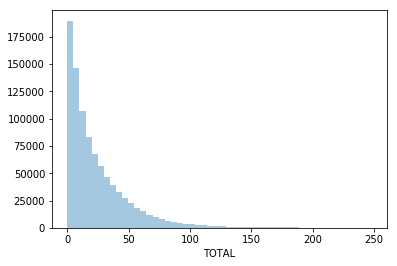

In [83]:
sns.distplot(db['TOTAL'], kde=False)

Tenga en cuenta que estamos utilizando `sns` en lugar de` pd`, ya que la función pertenece a `seaborn` en lugar de` pandas`.

Podemos ver rápidamente que la mayoría de las transacciones por molinete cada 15 minutos se encuentran por debajo de las 50.

* Kernel Density Plots

Los histogramas son útiles, pero son artificiales en el sentido de que una variable continua se hace discreta al convertir los valores en grupos discretos. Una alternativa es la estimación de la densidad del núcleo (KDE), que produce una función de densidad empírica:

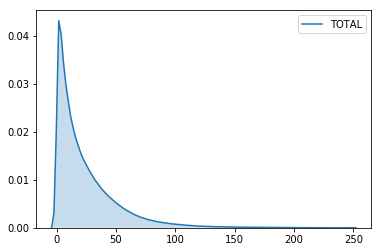

In [86]:
sns.kdeplot(db['TOTAL'], shade=True)

* Line and bar plots

Another very common way of visually displaying a variable is with a line or a bar chart. For example, if we want to generate a line plot of the (sorted) total population by area:

In [ ]:
trx_por_linea

C:\Users\FGONZALEZ\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


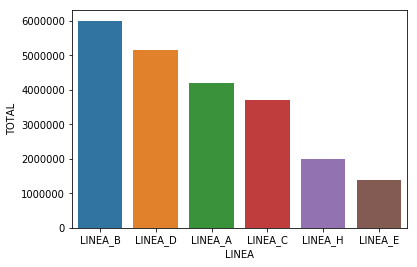

In [88]:
sns.barplot(x="LINEA", y="TOTAL", data=trx_por_linea)

In [89]:
trx_por_dia_linea.head()

,LINEA,dia_semana,TOTAL
0,LINEA_A,domingo,144398
1,LINEA_A,jueves,823766
2,LINEA_A,lunes,641634
3,LINEA_A,martes,670743
4,LINEA_A,miercoles,824801


C:\Users\FGONZALEZ\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


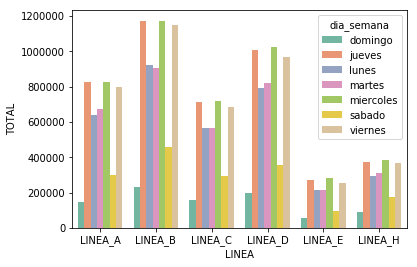

In [91]:
sns.barplot(x="LINEA", y="TOTAL", hue="dia_semana", data=trx_por_dia_linea,palette="Set2")

In [92]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia_semana,dia_semana1
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,jueves,3
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,jueves,3
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,jueves,3
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,jueves,3
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,jueves,3


## procesamiento para lo que sigue

In [102]:
#otra herramienta poderosa map y funciones lambda
db['hora'] = db.DESDE.map(lambda x: int(x[:2])) 
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia_semana,dia_semana1,hora
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,jueves,3,5
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,jueves,3,5
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,jueves,3,5
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,jueves,3,5
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,jueves,3,5


In [111]:
dataInsumo = db.loc[:,['dia_semana','hora','LINEA','ID','TOTAL']].groupby(['dia_semana','hora','LINEA','ID',]).sum().reset_index()
dataInsumo['q'] = pd.qcut(dataInsumo.TOTAL,5,labels=False) + 1
dataInsumo.head()

,dia_semana,hora,LINEA,ID,TOTAL,q
0,domingo,8,LINEA_A,31,137,1
1,domingo,8,LINEA_A,32,88,1
2,domingo,8,LINEA_A,33,246,1
3,domingo,8,LINEA_A,34,192,1
4,domingo,8,LINEA_A,35,321,1


In [113]:
dataInsumo.to_csv('data/dataInsumo.csv',index=False)


---

Basado en :

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'17 - Lab 1, part I</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

